In [245]:
import seaborn as sns
import pandas as pd
import wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
import numpy as np
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
import warnings

In [2]:
import os
os.chdir('C:\\Users\\clyde\\Documents\\Thinkful\\Data Science Bootcamp\\Unit-3\\Lesson 5\\reviews_Apps_for_Android_5\\')
path = os.getcwd()
end_file = path + '\\Apps_for_Android_5.json'
end_file

'C:\\Users\\clyde\\Documents\\Thinkful\\Data Science Bootcamp\\Unit-3\\Lesson 5\\reviews_Apps_for_Android_5\\Apps_for_Android_5.json'

In [3]:
amazon_df = pd.read_json(end_file,lines=True)
amazon_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B004A9SDD8,"[1, 1]",3,"Loves the song, so he really couldn't wait to ...","11 2, 2013",A1N4O8VOJZTDVB,Annette Yancey,Really cute,1383350400
1,B004A9SDD8,"[3, 4]",5,My 1 year old goes back to this game over and ...,"12 6, 2012",A2B54P9ZDYH167,"Brooke Greenstreet ""Babylove""",We love our Monkeys!,1354752000
2,B004A9SDD8,"[1, 1]",5,There are three different versions of the song...,"02 1, 2014",AFOFZDTX5UC6D,C. Galindo,This is my granddaughters favorite app on my K...,1391212800
3,B004A9SDD8,"[3, 3]",5,THis is just so cute and a great app for littl...,"12 5, 2012",A331GYAT4ESYI3,Felicia,so cute,1354665600
4,B004A9SDD8,"[3, 4]",5,I watch my great grandson 4 days a week and it...,"10 14, 2013",A2YEHF8T823TDC,Gale White Miller,Terrific!,1381708800


In [4]:
df1 = pd.DataFrame()
df1['Data'] = amazon_df.reviewText
#[df.loc[i]['indent'] = df.loc[i]['data'].split('\t')[1].split('\n')[0] for i,x in enumerate(df)]

In [5]:
temp = pd.DataFrame()
temp['data'] = df1['Data']
temp['count'] = df1['Data'].apply(lambda x: len(str(x).split(" ")))
temp['char_count'] = df1['Data'].str.len()

In [23]:
def num_word(sentence):
  words = sentence.split()
  return (len(words))

In [24]:
temp['num_word'] = df1['Data'].apply(lambda x: num_word(x))

In [26]:
temp = temp.drop(temp[temp['num_word']==0].index)

In [27]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [30]:
temp['avg_word'] = temp['data'].apply(lambda x: avg_word(x))

In [31]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [32]:
from nltk.corpus import opinion_lexicon

In [33]:
negative = opinion_lexicon.negative()
positive = opinion_lexicon.positive()

In [34]:
temp['stopwords'] = df1['Data'].apply(lambda x: len([x for x in x.split() if x in stop]))
temp['hastags'] = df1['Data'].apply(lambda x: len([x for x in x.split() if x.endswith('!')]))
temp['numerics'] = df1['Data'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
temp['upper'] = df1['Data'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [36]:
temp['stopwords'] = df1['Data'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [ ]:
temp['negative']  = df1['Data'].apply(lambda x: len([x for x in x.split() if x in negative]))

In [56]:
df1['score'] = amazon_df.overall

In [237]:
df1['Value'] = np.where(df1.score>2,1,0)
temp['Value'] = df1['Value']

In [64]:
df1_pos = df1[df1['Value'] ==1]
df1_neg = df1[df1['Value'] ==0]

amaz_pos_words = ''
amaz_neg_words = ''

for i in df1_pos['Data'].index:
    amaz_pos_words = amaz_pos_words + df1_pos.loc[i]['Data']
    
for i in df1_neg['Data'].index:   
    amaz_neg_words = amaz_neg_words + df1_neg.loc[i]['Data']

In [65]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

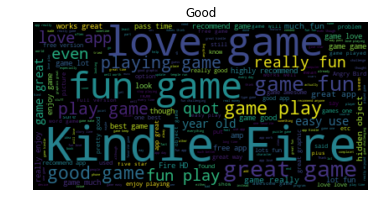

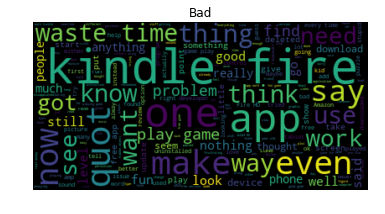

In [66]:
pos_words = WordCloud().generate(amaz_pos_words)
neg_words = WordCloud().generate(amaz_neg_words)

plt.imshow(pos_words, interpolation='bilinear')
plt.axis("off")
plt.title("Good")
plt.show()

plt.imshow(neg_words,interpolation = 'bilinear')
plt.axis("off")
plt.title("Bad")
plt.show()
features = pd.DataFrame()


In [152]:
neg_words_list =[]
pos_words_list =[]
i=1
for keys in neg_words.words_:
    neg_words_list.append(keys)
    
for keys in pos_words.words_:
    pos_words_list.append(keys)

In [134]:
from nltk.corpus import opinion_lexicon

In [135]:
negative = opinion_lexicon.negative()
positive = opinion_lexicon.positive()

In [178]:
nn =  [x for x in pos_words_list[1].split()[0] if x in positive]

In [207]:
pos_wrd = pd.DataFrame(pos_words_list)
neg_wrd = pd.DataFrame(neg_words_list)

In [220]:
pwl = pos_wrd.loc[:][0].apply(lambda x: [x for x in x.split() if x in positive])
nwl = neg_wrd.loc[:][0].apply(lambda x: [x for x in x.split() if x in negative])

In [221]:
pw_list =[]
nw_list = []
for x in pwl:
    pw_list.extend(x)
    
for x in nwl:
    nw_list.extend(x)

In [222]:
pw_list = list(set(pw_list))
nw_list = list(set(nw_list))

In [224]:
temp['negative']  = df1['Data'].apply(lambda x: len([x for x in x.split() if x in nw_list]))
temp['positive']  = df1['Data'].apply(lambda x: len([x for x in x.split() if x in pw_list]))

In [239]:
amazon = temp.loc[:,['stopwords','numerics','upper','avg_word','count','char_count','negative','positive','Value']]
amazon = amazon.dropna()
target = amazon['Value']

In [241]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
X = std_scaler.fit_transform(amazon.values)
y=target

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state = 24)
#X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'],axis=1),df['Class'],test_size=.4,random_state = 24)

In [248]:
classifiers = {
    "LogisiticRegression": LogisticRegression(solver ='lbfgs'),
    "KNearest": KNeighborsClassifier(n_neighbors=2),
    "DecisionTreeClassifier": RandomForestClassifier(n_estimators=10, max_depth=2,random_state=0)
}

In [249]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=2)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 100.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 100.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 97.0 % accuracy score
